### Random walks and image segmentation

Via simple examples we visualise the use of random walks for image segmentation<!-- .slide: data-fullscreen -->

At the beginning, images are represented as a grid networks of pixels, each one having a color value. 

By making the walkers avoid neighbour pixels that are too `different` from the one they're on, we are forcing them to stay in the same region of the image, thus segmenting it.


In [1]:
import matplotlib.pyplot as plt

import numpy as np

import random as rand

Let's look at the benckmark image seen in class, a B29 Stratofortress flying over a cloudy sky: can we automatically detect it?

That is image 3096 the [Berkley Segmentation Dataset and Benchmark](https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/)

The image below (a JPG version of the original PNG image) is $481\times 321=154,401$ pixels in size.


 A simplified dataset it the [BSD68 benckmark dataset](https://github.com/clausmichele/CBSD68-dataset/tree/master) which is a collection of images with a ground truth-segmentation mask that is used to benchmark *denoising*

![](https://raw.githubusercontent.com/clausmichele/CBSD68-dataset/master/CBSD68/groundtruth/airplane.png)

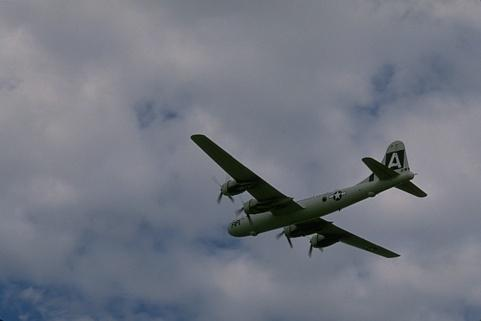

Find the original image and some example segmentations at [eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/dataset/images/color/3096.html](https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/dataset/images/color/3096.html)

The random walks are started from a set of `seed` pixels, which are the ones we want to keep in the same segment.

In [2]:
import numpy as np

import scipy as sp

import matplotlib.pyplot as plt

In [3]:
IMGFILE = './imgs/0000.png'

In [4]:
bitmap = np.array((481, 321, 3))

In [5]:
from PIL import Image

In [6]:
bitmap = Image.open(IMGFILE)


In [7]:
# is it the right image?
# bitmap

In [8]:
matrix = np.array(bitmap)

print(matrix.shape)

print(matrix[0, 0, :])

(321, 481, 3)
[135 138 143]


In [9]:
# the key dimensions
M = matrix.shape[0]
N = matrix.shape[1]

#### Norms

Compute the difference, in color, between adjacent pixels.

Such difference is the norm of the difference vector in the 3-dimensional *space of color,* where values are in the 0..255 interval.

This is the formula from the slides:

$|p_{ij}|_3 = \frac{1}{\sqrt{3}} \sqrt{\frac{p^{red}_{ij}+p^{green}_{ij}+p^{blue}_{ij}}{255}}$


In [ ]:
def three_norm(pixel)->float:
    red = pixel[0]
    green = pixel[1]
    blue = pixel[2]

    return 0.55 

#### Random walks

we are going to use the `random_walker` function from `skimage.segmentation`. 


This function takes an image and a set of seed pixels, and returns a segmentation of the image based on the random walk algorithm.

```python

In [10]:
WALKERS = 100

# Lenght of the walk
STEPS = 10000

Boundaries is the matrix/image recording the walks

In [11]:
boundaries = np.zeros([M, N, 1])

print(boundaries.shape)

(321, 481, 1)


In [12]:
seed = np.random.RandomState(407)

Now we run a number (`WALKERS`) of separated random walkers, each covering a number (`STEPS`) of steps<!-- .slide: data-fullscreen -->

This corresponds, in the *fair-weather fan* scenario, to the fairweather fans attending `STEPS` games.

In [13]:
for w in range(WALKERS):

    x = rand.randint(0, M)
    y = rand.randint(0, N)
    
    walk = [(x,y)]
    
    for i in range(STEPS):

        x, y = walk[-1]

        neighbors = []

        # it can move to the left
        if x > 0:
            neighbors.append((x-1, y))

        # it can move to the right
        if x < M - 1:
            neighbors.append((x+1, y))

        # it can move up
        if y > 0:
            neighbors.append((x, y-1))
            
        # it can move down
        if y < N - 1:
            neighbors.append((x, y+1))
        
        next_step = rand.choice(neighbors)
        
        walk.append(next_step)
    
        # light up the pixel as it passess through
        boundaries[x, y, 0] += 1
        

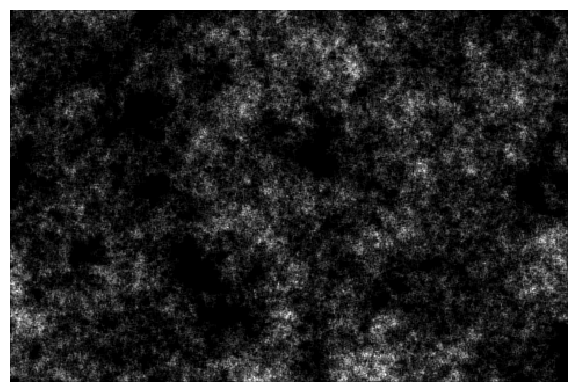

In [14]:
plt.matshow(boundaries[:, :, 0], cmap='gray')
plt.axis('off')
plt.show()